<a href="https://colab.research.google.com/github/ArnavBhatia68/MAT-421-HW/blob/main/ModuleB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

HW2 - Arnav Bhatia

Course: MAT 421

Date: January 21, 2025

17.1 Interpolation Problem Statement

Concept Explanation

Interpolation is the process of constructing a function that exactly fits a given set of data points (xi,yi).

This is different from regression, where one usually assumes measurement errors and fits a function that may not pass exactly through every point.

Interpolation is often used when we trust the data points are accurate and need a function f(x) such that f(xi)=yi.

Let’s visualize a small dataset:



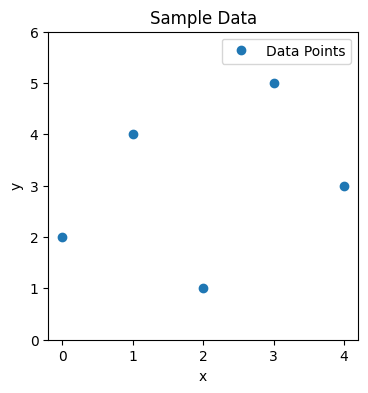

In [1]:
# In [1]:

import matplotlib.pyplot as plt

# Example data
x_data = [0, 1, 2, 3, 4]
y_data = [2, 4, 1, 5, 3]

plt.figure(figsize=(4,4))
plt.plot(x_data, y_data, 'o', label='Data Points')
plt.title("Sample Data")
plt.xlabel("x")
plt.ylabel("y")
plt.ylim(0,6)
plt.legend()
plt.show()


Key Points:

Interpolation can give us an estimated y-value at any x within the data’s domain, as long as we stay between the minimum and maximum x.

Extrapolation (estimating beyond the range of the data) is risky because we don’t have guaranteed accuracy outside our known points.


17.2 Linear Interpolation

Concept Explanation

Linear interpolation connects each pair of adjacent data points with a straight line. If you want to estimate a value for some x between two known x-values, you simply pick the point on the straight line segment joining those two known data points. It is easy to implement but can appear “piecewise linear” and lacks smoothness at the data points (no continuous derivative).

The equation for this would be:

y(x) = yi + [(yi+1 - yi)(x - xi)] / [xi+1 - xi]

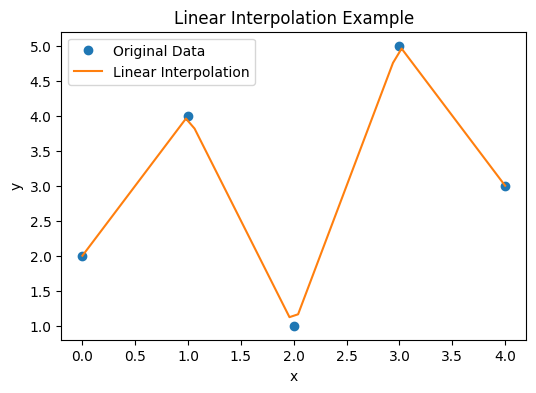

Interpolated value at x=2.5: 3.0


In [2]:
# In [2]:

import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

# Our data from above
x_data = np.array([0, 1, 2, 3, 4])
y_data = np.array([2, 4, 1, 5, 3])

# Create a linear interpolation function
linear_interp = interp1d(x_data, y_data, kind='linear')

# Let's create a finer set of x-values from 0 to 4 in small steps
x_fine = np.linspace(0, 4, 50)
y_linear = linear_interp(x_fine)

plt.figure(figsize=(6,4))
plt.plot(x_data, y_data, 'o', label='Original Data')
plt.plot(x_fine, y_linear, '-', label='Linear Interpolation')
plt.title("Linear Interpolation Example")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

# Let's try a specific interpolation, say at x=2.5
print("Interpolated value at x=2.5:", linear_interp(2.5))


17.3 Cubic Spline Interpolation

Concept Explanation

Cubic spline interpolation fits a piecewise cubic polynomial between each pair of consecutive data points.

Each segment is described by a cubic function, and the segments meet in a way that ensures smoothness (e.g., continuous first and second derivatives).

For n data points, we get n−1 cubic polynomials, each with 4 unknown coefficients, leading to a system of equations.

Example in Python

We’ll use scipy.interpolate.CubicSpline to create and evaluate a cubic spline. Compare the result to the linear interpolation from above.


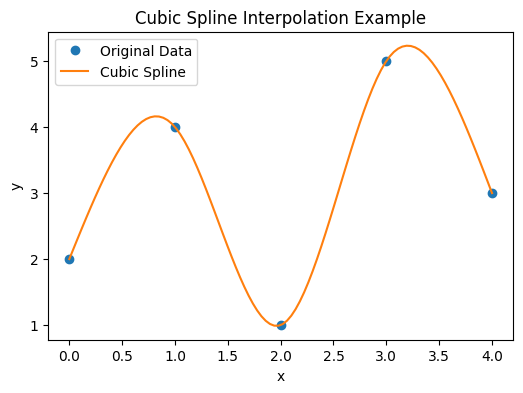

Cubic spline value at x=2.5: 2.779017857142857


In [3]:
# In [3]:

from scipy.interpolate import CubicSpline

# Same data
x_data = np.array([0, 1, 2, 3, 4])
y_data = np.array([2, 4, 1, 5, 3])

# Create a cubic spline interpolation
# bc_type='natural' means the second derivative is zero at the boundaries
cubic_interp = CubicSpline(x_data, y_data, bc_type='natural')

# Evaluate it on a fine grid
x_fine = np.linspace(0, 4, 100)
y_cubic = cubic_interp(x_fine)

plt.figure(figsize=(6,4))
plt.plot(x_data, y_data, 'o', label='Original Data')
plt.plot(x_fine, y_cubic, label='Cubic Spline')
plt.title("Cubic Spline Interpolation Example")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

# Let's see the interpolation at x=2.5 here as well
print("Cubic spline value at x=2.5:", cubic_interp(2.5))
